<a href="https://colab.research.google.com/github/Lucie-Nek/Project-Investigating-Netflix-Movies-and-Guest-Stars-in-The-Office-Guided-DataCamp-Project/blob/main/Classification_Predict_Eg4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EA - Sentiment Analysis on Climate Change Tweets

Team members:    

    Jonathon Thomson
    Amanda Sibanda
    Mkhosi
    Lucpah Nekati
    Mulalo Manthanda
    Fhulufhelo Faith Nengome
    

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing packages and Libraries</a>

<a href=#four>4. Data Loading and Preprocessing</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Model Building</a>

<a href=#eight>8. Hyperparameter Tuning</a>

<a href=#nine>9. Model Evaluations</a>

<a href=#ten>10. Inference</a>

<a href=#eleven>11. Conclusion and Recommendations</a>

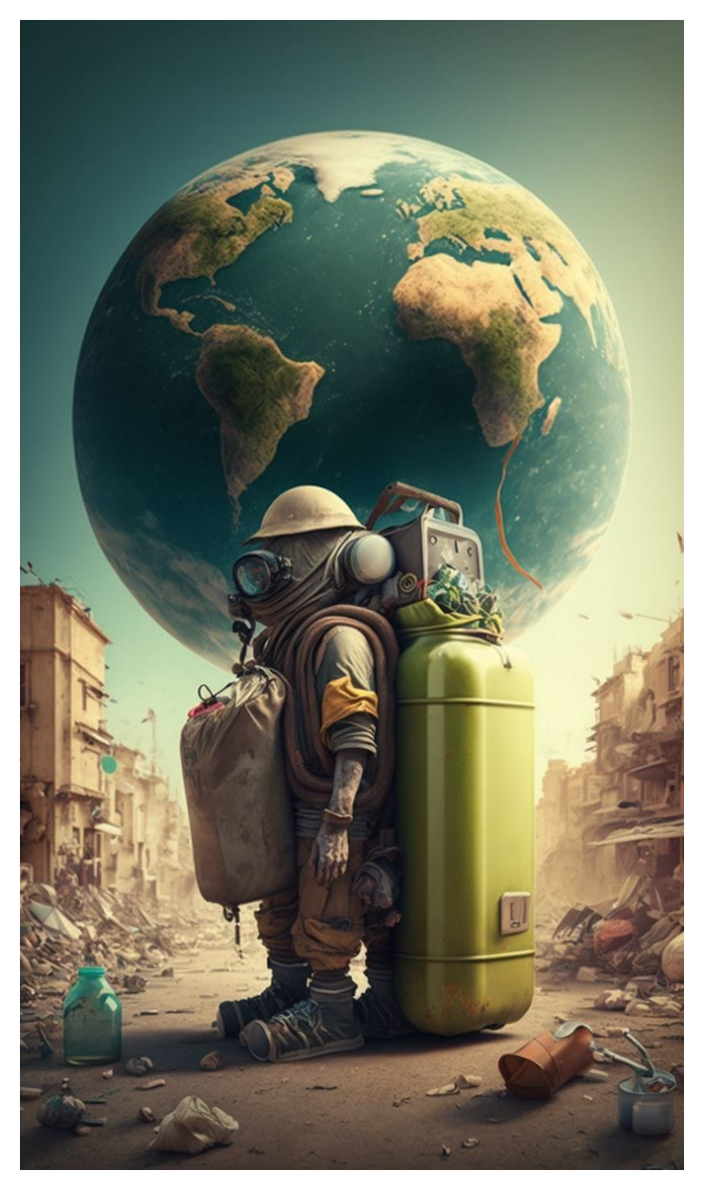

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread(r"/content/download.png")

# Set the figure size to make the image larger
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Display the image
plt.imshow(img)
plt.axis('off')

# Center the image within the notebook cell
plt.tight_layout()
plt.show()

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

We, as a company, focus on reducing our environmental impact and carbon footprint. Our offerings include products and services that align with our values and ideals, emphasizing environmental friendliness and sustainability. We aim to understand public perceptions regarding climate change and whether it is perceived as a genuine threat. This research effort will contribute to our market research endeavors, providing us access to a broad base of consumer sentiment spanning multiple demographic and geographic categories. This access increases our insights and informs our future marketing strategies.

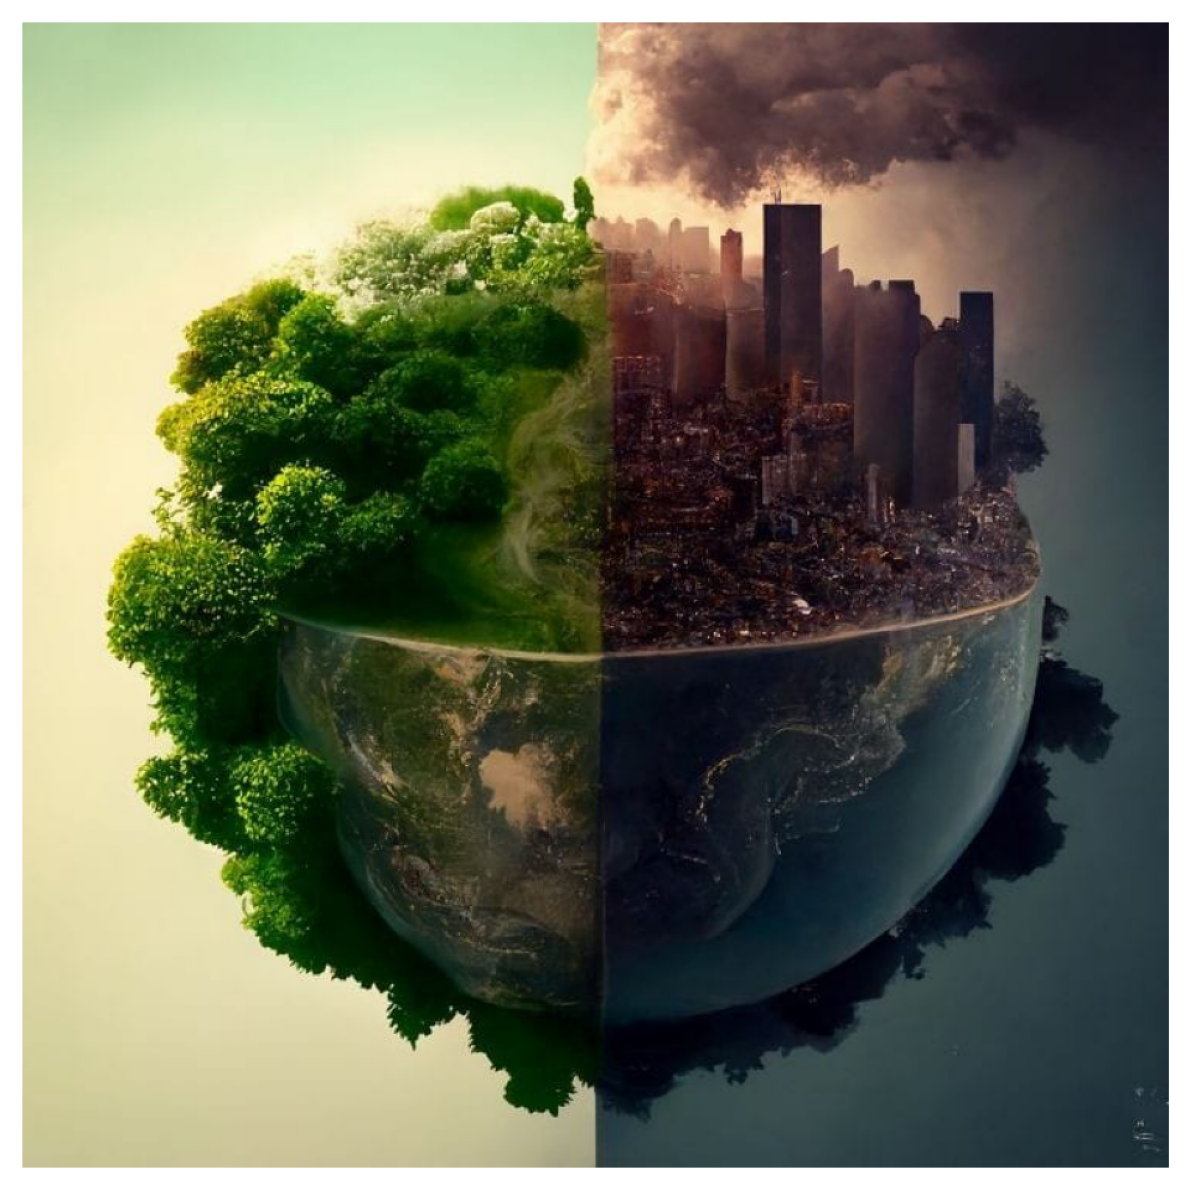

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread(r"/content/download (1).png")

# Set the figure size to make the image larger
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels


# Center the image within the notebook cell
plt.tight_layout()
plt.show()

# <a id="two"></a>
# 2. Project overview
<a href=#cont>Back to Table of Contents</a>

 <a id="two"></a>
## 2.1. Problem statement
<a href=#cont>Back to Table of Contents</a>




In the era of growing environmental consciousness, many companies are dedicated to offering eco-friendly and sustainable products and services. Understanding public sentiment towards climate change is crucial for these companies to tailor their marketing strategies effectively. Our aim is to develop a machine learning model capable of classifying whether individuals believe in climate change based on their Twitter activity using a dataset with 43,943 tweets collected between Apr 27, 2015, and Feb 21, 2018.

# <a id="two"></a>
## 2.2. Objective
<a href=#cont>Back to Table of Contents</a>

The goal of this project is to develop a sentiment analysis model for climate change-related tweets. The model will classify tweets into different sentiment classes, providing insights into public perceptions of climate change. The sentiment classes include Pro, News, Neutral, and Anti, representing various perspectives on man-made climate change.

* Class 1 (Pro): Tweets supporting the belief in man-made climate change.
* Class 2 (News): Tweets linking to factual news about climate change.
* Class 0 (Neutral): Tweets that neither support nor refute the belief in man-made climate change.
* Class -1 (Anti): Tweets expressing disbelief in man-made climate change.

<a id="two"></a>
## 2.3. Data Source
<a href=#cont>Back to Table of Contents</a>


A Kaggle dataset consisting of tweets collected between Apr 27, 2015, and Feb 21, 2018, funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch at the University of Waterloo. It includes 43,943 labeled tweets, each categorized into one of the four sentiment classes.

**Data Features**

* sentiment: Indicates the sentiment class of the tweet (Pro, News, Neutral, Anti).
* message: The body of the tweet.
* tweetid: Twitter unique ID.

<a id="two"></a>
## 2.3. Tasks
<a href=#cont>Back to Table of Contents</a>

1. Text Preprocessing:

* Clean the text data, remove special characters, and tokenise the messages.
* Perform stemming or lemmatisation based on experimentation and analysis.

2. Exploratory Data Analysis (EDA):
* Explore the distribution of sentiment classes.
* Analyze word frequency in different sentiment classes.
* Visualise sentiment patterns and common words.

3. Feature Engineering:
* Extract relevant features from the text data.
* Consider TF-IDF, word embeddings, or other techniques for numerical representation.

4. Model Development:
* Train a machine learning model on the preprocessed data.
* Evaluate the model's performance using metrics like F1-Score.

5. Insights and Visualisation:
* Generate insights into public sentiment on climate change.
* Visualise sentiment trends and key words associated with each sentiment class.

6. Model Deployment:
* Model to deployed for reak-time sentiment analysis through Streamlit.

<a id="two"></a>
## 2.4. Deliverables
<a href=#cont>Back to Table of Contents</a>

* Trained sentiment analysis model.
* Insights into public sentiment on climate change.
* Visualisation of sentiment trends and common words.
* Documentation and code for reproducibility.

<a id="two"></a>
## 2.5. Significance
<a href=#cont>Back to Table of Contents</a>

By providing an accurate and robust solution to this task, we will offer companies valuable insights into public sentiment regarding climate change. This, in turn, will empower them to align their products and marketing strategies with the prevailing beliefs and concerns of the target audience, contributing to a more effective and sustainable market approach.

<a id="three"></a>
## 3. Importing packages and Libraries
<a href=#cont>Back to Table of Contents</a>
        
        Packages and libraries that we will use in the project

In [5]:
! pip install catboost
! pip install xgboost
! pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [2]:
# Install nltk for natural language processing
! pip install nltk

In [3]:
# Install contractions
! pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.8 MB/s eta 0:00:00


In [6]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import re

# Libraries for processing natural language
import contractions
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

# Libraries for data preparation and model building
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import impute
from sklearn import pipeline
from sklearn import compose
from sklearn import calibration
from scipy.stats import kurtosis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Model Evaluation and Hyperparameter Tuning
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pickle

# Notebook Environment
from IPython.core.display import HTML

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 <a id="four"></a>
## 4. Data Loading and Preprocessing
<a href=#cont>Back to Table of Contents</a>
    
    
        Importing the dataset containing tweet data.
        Cleaning and preparing the text data for analysis (removing special characters, stopwords, tokenization, etc.)

In [9]:
# Load train dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

# Load tets dataset
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [10]:
# View first 5 entries of train_df set
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [11]:
# View first 5 entries of test_df set
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

* The message feature has special characters like @, : that will need to be removed. There are also stopwords that we do not need and will be removed in the EDA section. Th feature also has mixed cases which will be converted to lowercase for easy handling of data.

In [ ]:
# Check shape of datasets
print(train_df.shape)
print(test_df.shape)

(15819, 3)
(10546, 2)


In [ ]:
# Check information of traind_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [ ]:
# Check information of test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


* Train_df has 15819 entries and 3 features, and test_df has 10546 entries and 2 features.
* There are no missing values but will confirm by checking for null values.

In [ ]:
# Check for missing values
print(train_df.isna().sum())
print(test_df.isna().sum())

sentiment    0
message      0
tweetid      0
dtype: int64
message    0
tweetid    0
dtype: int64


In [ ]:
# Check unique sentiments in train_df
train_df['sentiment'].unique()

array([ 1,  2,  0, -1])

There are four unique sentiments in the sentiment feature:
* 1 Pro: the tweet supports the belief of man-made climate change
* 2 News: the tweet links to factual news about climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change Variable definitions

<a id="five"></a>
## 5. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>


    Statistical summary of the dataset for example Basic statistical insights (number of tweets)
    Visualization: Plotting word clouds, frequency distributions, or histograms to understand
    the distribution of sentiments and most common tweets.

In [12]:
# Display the distribution of sentiments
def plot_sentiment_distribution(df, title='Distribution of Sentiments'):
    """
    Plot the distribution of sentiment classes in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing a 'sentiment' column.
    - title (str): Title for the plot.

    Returns:
    None (displays the plot).
    """
    # Map sentiment values to corresponding labels
    sentiment_class = {
        1: 'pro',
        2: 'news',
        0: 'neutral',
        -1: 'anti'
    }

    # Count the occurrences of each sentiment class
    sentiment_counts = df['sentiment'].value_counts()

    # Sort the sentiments in the desired order
    sorted_sentiments = sentiment_counts.index.map(sentiment_class)

    # Add class and value count features to the DataFrame
    df['sentiment_class'] = df['sentiment'].map(sentiment_class)

    # Define different shades of green
    colors = ['lightgreen', 'mediumseagreen', 'forestgreen', 'darkgreen']

    # Plot the bar chart with counts and custom colors
    plt.figure(figsize=(8, 6))
    bars = plt.bar(sorted_sentiments, sentiment_counts, color=colors)

    # Add counts as text annotations on top of the bars
    for bar, count in zip(bars, sentiment_counts):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), fontsize=10)

    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


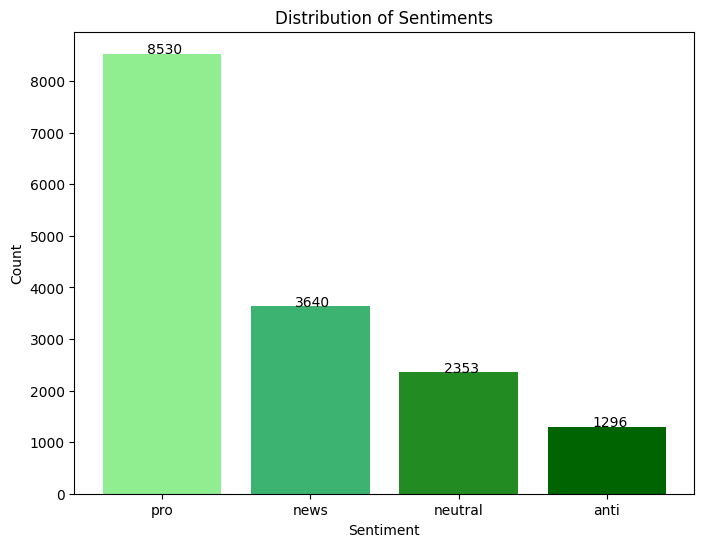

In [13]:
# Show distribution of sentiments in train_df
plot_sentiment_distribution(train_df, title='Distribution of Sentiments')

* Exploring the distribution of sentiments allows us to understand the class balance of our data. The most common sentiment is ***pro*** in our graph, followed by ***news***, ***neutral***, and lastly, ***anti***. This causes class inbalance for our model and may require resampling.

In [14]:
# Expand contractions in the message feature
def expand_contractions(text):
    """
    Expand contractions in a given text using the contractions library.

    Parameters:
    - text (str): Input text containing contractions.

    Returns:
    str: Text with expanded contractions.
    """
    expanded_text = contractions.fix(text)
    return expanded_text

def expand_contractions_in_column(dataframe, text_column='message'):
    """
    Expand contractions in a specific column of a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame containing text data.
    - text_column (str): Name of the column containing the text data.

    Returns:
    pd.DataFrame: DataFrame with expanded contractions.
    """
    # Apply the expand_contractions function to the specified column
    dataframe[text_column] = dataframe[text_column].apply(expand_contractions)
    return dataframe


In [15]:
# Expand contractions in train_df
expanded_train_dataframe = expand_contractions_in_column(train_df, text_column='message')

In [16]:
# Expand contractions in test_df
expanded_test_dataframe = expand_contractions_in_column(test_df, text_column='message')

In [42]:
# Clean the message feature by removing special characters and stopwords
def clean_and_preprocess_text(df, text_column):
    """
    Clean and preprocess text data by removing special characters and stopwords.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing text data.
    - text_column (str): Name of the column in the DataFrame containing text data.

    Returns:
    pd.DataFrame: DataFrame with an additional column for the cleaned text.
    """

    # Make a copy of the original DataFrame to avoid modifying the input DataFrame
    cleaned_df = df.copy()

    # Define a function to clean and preprocess text
    def clean_text(text):
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www.\S+', '', text)

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

        # Join the cleaned tokens into a string
        cleaned_message = ' '.join(filtered_tokens)

        return cleaned_message

    # Apply the clean_text function to the specified column
    cleaned_df['cleaned_message'] = cleaned_df[text_column].apply(clean_text)

    return cleaned_df

In [43]:
# Show cleaned data for train_df
cleaned_train_df = clean_and_preprocess_text(train_df, 'message')
cleaned_train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief does not think carbon d...   625221   
1          1  It is not like we lack evidence of anthropogen...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954   

  sentiment_class                                    cleaned_message  
0             pro  polyscimajor epa chief think carbon dioxide ma...  
1             pro    like lack evidence anthropogenic global warming  
2            news  rt rawstory researchers say three years act cl...  
3             pro  todayinmaker wired pivotal year war climate ch...  
4             pro  rt soynoviodetodas racist sexist climate chang...

In [44]:
# Show cleaned data for test_df
cleaned_test_df = clean_and_preprocess_text(test_df, 'message')
cleaned_test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms because glo...   872928   

                                     cleaned_message  
0  europe looking china make sure alone fighting ...  
1  combine polling staffers climate change womens...  
2  scary unimpeachable evidence climate change al...  
3  karoli morgfair osborneink dailykos putin got ...  
4  rt fakewillmoore female orgasms global warming...

* The message column has been cleaned by removing special characters, stop words, and converting the characters to lowercase and stored in the cleaned_message column.

In [45]:
# Tokenize data in cleaned_message feature
def tokenize_text(df, text_column):
    """
    Tokenize the text in a specified column of a DataFrame.

    Parameters:

      df (pd.DataFrame): Input DataFrame containing text data.
      text_column (str): Name of the column in the DataFrame containing text data.

    Returns:

      pd.DataFrame: DataFrame with an additional column for the tokenized text.

    """

    # Make a copy of the original DataFrame to avoid modifying the input DataFrame
    tokenized_df = df.copy()

    # Tokenize the text
    tokenized_df['tokens'] = tokenized_df[text_column].apply(word_tokenize)

    return tokenized_df

In [46]:
# Show tokenized data for cleaned_train_df
tokenized_train_df = tokenize_text(cleaned_train_df, 'cleaned_message')
tokenized_train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief does not think carbon d...   625221   
1          1  It is not like we lack evidence of anthropogen...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954   

  sentiment_class                                    cleaned_message  \
0             pro  polyscimajor epa chief think carbon dioxide ma...   
1             pro    like lack evidence anthropogenic global warming   
2            news  rt rawstory researchers say three years act cl...   
3             pro  todayinmaker wired pivotal year war climate ch...   
4             pro  rt soynoviodetodas racist sexist climate chang...   

                                              tokens  
0  [polyscimajor, epa, chief, think, carbon, diox...  
1  [like, lack, evidence, anthropogenic, global, ...  
2  [rt, rawstory, researchers, say, three, years,...  
3  [todayinmaker, wired, pivotal, year, war, clim...  
4  [rt, soynoviodetodas, racist, sexist, climate,...

In [47]:
# Show tokenized data for cleaned_test_df
tokenized_test_df = tokenize_text(cleaned_test_df, 'cleaned_message')
tokenized_test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms because glo...   872928   

                                     cleaned_message  \
0  europe looking china make sure alone fighting ...   
1  combine polling staffers climate change womens...   
2  scary unimpeachable evidence climate change al...   
3  karoli morgfair osborneink dailykos putin got ...   
4  rt fakewillmoore female orgasms global warming...   

                                              tokens  
0  [europe, looking, china, make, sure, alone, fi...  
1  [combine, polling, staffers, climate, change, ...  
2  [scary, unimpeachable, evidence, climate, chan...  
3  [karoli, morgfair, osborneink, dailykos, putin...  
4  [rt, fakewillmoore, female, orgasms, global, w...

In [48]:
# Show the most common words
def print_most_common_words(df, text_column='cleaned_message', top_n_words=10):
    """
    Print the most common words in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with a text column.
    - text_column (str): Name of the column containing the text data.
    - top_n_words (int): Number of most common words to consider.

    Returns:
    None (prints the most common words with their counts).
    """
    # Tokenize and preprocess the text
    df['tokens'] = df[text_column].apply(lambda x: x.split())

    # Count overall word frequency
    overall_tokens = [word for tokens in df['tokens'] for word in tokens]
    overall_word_frequency = FreqDist(overall_tokens)
    overall_most_common = overall_word_frequency.most_common(top_n_words)

    # Print the most common words
    print(f"Most common words in the dataset:")
    for word, count in overall_most_common:
        print(f"{word}: {count} times")

In [49]:
# Show most common words
print_most_common_words(tokenized_train_df, text_column='cleaned_message', top_n_words=30)

Most common words in the dataset:
climate: 12963 times
change: 12558 times
rt: 9723 times
global: 3779 times
warming: 3503 times
trump: 1943 times
believe: 1159 times
amp: 880 times
us: 811 times
going: 734 times
real: 717 times
people: 651 times
world: 640 times
epa: 564 times
via: 547 times
new: 541 times
fight: 475 times
trumps: 468 times
like: 466 times
science: 454 times
hoax: 451 times
says: 430 times
die: 418 times
scientists: 412 times
donald: 388 times
say: 372 times
think: 363 times
thinking: 354 times
would: 349 times
president: 338 times


In [50]:
# Plot most common words
def plot_most_common_words(df, text_column='cleaned_message', top_n_words=10):
    """
    Plot a bar chart of the most common words in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with a text column.
    - text_column (str): Name of the column containing the text data.
    - top_n_words (int): Number of most common words to consider.

    Returns:
    None (displays the bar chart).
    """
    # Tokenize and preprocess the text
    df['tokens'] = df[text_column].apply(lambda x: x.split())

    # Count overall word frequency
    overall_tokens = [word for tokens in df['tokens'] for word in tokens]
    overall_word_frequency = FreqDist(overall_tokens)
    overall_most_common = overall_word_frequency.most_common(top_n_words)

    # Extract words and counts for plotting
    words, counts = zip(*overall_most_common)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='darkgreen')
    plt.xlabel('Occurrence')
    plt.ylabel('Most Common Words')
    plt.title('Top Most Common Words')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


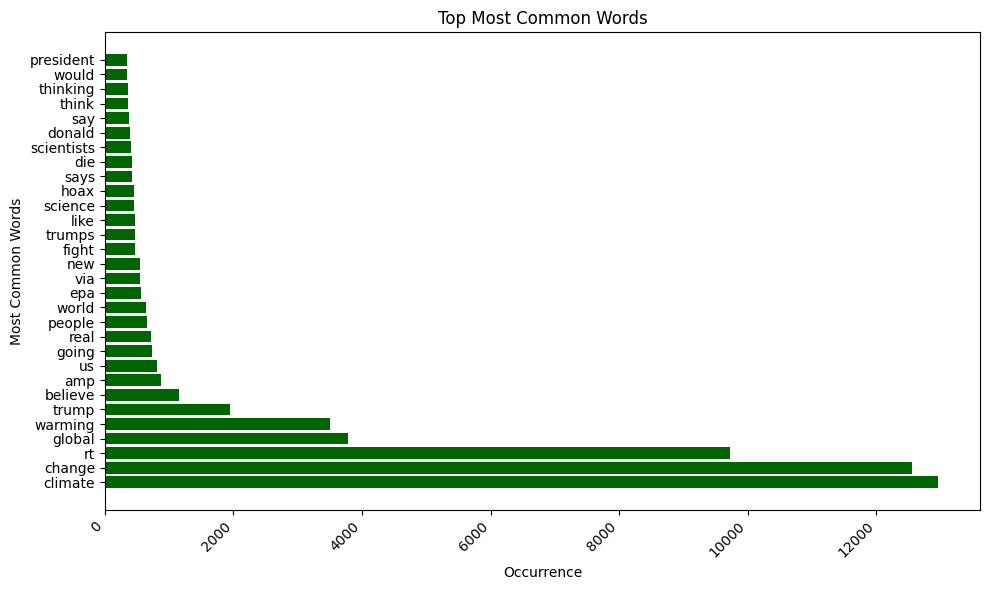

In [51]:
plot_most_common_words(tokenized_train_df, text_column='cleaned_message', top_n_words=30)

In [52]:
# Show most common words by sentiment_class
def most_common_words_by_sentiment(df, text_column='cleaned_message', top_n_words=10):
    """
    Get the most common words in each sentiment class of a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with sentiment and text columns.
    - text_column (str): Name of the column containing the text data.
    - top_n_words (int): Number of most common words to consider.

    Returns:
    pd.DataFrame: DataFrame with the most common words for each sentiment class.
    """
    # Tokenize and preprocess the text
    df['tokens'] = df[text_column].apply(lambda x: x.split())

    # Group DataFrame by sentiment class
    grouped_df = df.groupby('sentiment_class')

    most_common_words_df = pd.DataFrame(columns=['sentiment_class', 'word', 'count'])

    for sentiment_class, group in grouped_df:
        # Count word frequency within the sentiment class
        tokens_in_class = [word for tokens in group['tokens'] for word in tokens]
        word_frequency = FreqDist(tokens_in_class)
        most_common = word_frequency.most_common(top_n_words)

        # Append the results to the DataFrame
        for word, count in most_common:
            most_common_words_df = most_common_words_df.append({'sentiment_class': sentiment_class, 'word': word, 'count': count}, ignore_index=True)

    return most_common_words_df


In [53]:
most_common_words_result = most_common_words_by_sentiment(tokenized_train_df, text_column='cleaned_message', top_n_words=30)
most_common_words_result

sentiment_class       word count
0              anti    climate   801
1              anti     change   752
2              anti         rt   684
3              anti     global   635
4              anti    warming   612
..              ...        ...   ...
115             pro      think   236
116             pro       need   236
117             pro     thinks   219
118             pro  president   209
119             pro     action   202

[120 rows x 3 columns]

In [54]:
# Show most common words in the pro sentiment class
pro_most_common_words = most_common_words_result[most_common_words_result['sentiment_class'] == 'pro']
pro_most_common_words

sentiment_class             word count
90              pro          climate  7366
91              pro           change  7160
92              pro               rt  5797
93              pro           global  1597
94              pro          warming  1448
95              pro          believe  1005
96              pro            trump   903
97              pro              amp   660
98              pro            going   632
99              pro             real   516
100             pro           people   495
101             pro               us   451
102             pro            world   447
103             pro              die   394
104             pro         thinking   338
105             pro             hoax   325
106             pro          husband   312
107             pro             like   311
108             pro  stephenschlegel   307
109             pro            fight   287
110             pro              new   283
111             pro              epa   276
112             pro          science   251
113             pro       sensanders   249
114             pro              say   247
115             pro            think   236
116             pro             need   236
117             pro           thinks   219
118             pro        president   209
119             pro           action   202

In [55]:
# Show most common words in the new sentiment class
news_most_common_words = most_common_words_result[most_common_words_result['sentiment_class'] == 'news']
news_most_common_words

sentiment_class        word count
60            news     climate  3353
61            news      change  3243
62            news          rt  2151
63            news       trump   827
64            news      global   508
65            news     warming   442
66            news         via   302
67            news         epa   242
68            news        says   241
69            news      trumps   239
70            news          us   214
71            news         new   191
72            news  scientists   179
73            news      donald   166
74            news       fight   160
75            news       china   145
76            news       could   134
77            news        news   128
78            news       world   115
79            news       scott   112
80            news       paris   110
81            news      energy   101
82            news       chief   100
83            news   president   100
84            news       study    98
85            news     science    96
86            news      pruitt    96
87            news         may    93
88            news        plan    89
89            news   agreement    82

In [56]:
# Show most common words in the neutral sentiment class
neutral_most_common_words = most_common_words_result[most_common_words_result['sentiment_class'] == 'neutral']
neutral_most_common_words

sentiment_class     word count
30         neutral  climate  1443
31         neutral   change  1403
32         neutral       rt  1091
33         neutral   global  1039
34         neutral  warming  1001
35         neutral    trump   153
36         neutral       us   105
37         neutral      amp   101
38         neutral     real    99
39         neutral     like    96
40         neutral  believe    87
41         neutral  penguin    84
42         neutral    think    82
43         neutral   people    67
44         neutral    would    58
45         neutral    going    56
46         neutral     know    54
47         neutral      hot    52
48         neutral      one    49
49         neutral      get    46
50         neutral     says    45
51         neutral     club    44
52         neutral      new    44
53         neutral     said    44
54         neutral    world    41
55         neutral    thing    40
56         neutral     good    39
57         neutral    right    38
58         neutral     want    38
59         neutral    still    37

In [57]:
# Show most common words in the anti sentiment class
anti_most_common_words = most_common_words_result[most_common_words_result['sentiment_class'] == 'anti']
anti_most_common_words

sentiment_class             word count
0             anti          climate   801
1             anti           change   752
2             anti               rt   684
3             anti           global   635
4             anti          warming   612
5             anti              amp    84
6             anti          science    78
7             anti  realdonaldtrump    71
8             anti            would    63
9             anti             real    63
10            anti           people    61
11            anti            trump    60
12            anti              man    54
13            anti             hoax    51
14            anti             scam    51
15            anti             fake    50
16            anti             data    49
17            anti             made    48
18            anti          manmade    47
19            anti          believe    46
20            anti    stevesgoddard    44
21            anti            years    44
22            anti             make    42
23            anti            obama    41
24            anti               us    41
25            anti             like    41
26            anti             gore    40
27            anti               al    37
28            anti            world    37
29            anti            money    37

In [58]:
def plot_most_common_words_grouped(df, text_column='cleaned_message', top_n_words=10):
    """
    Plot a grouped and color-coded bar chart of the most common words by sentiment in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with sentiment and text columns.
    - text_column (str): Name of the column containing the text data.
    - top_n_words (int): Number of most common words to consider.

    Returns:
    None (displays the grouped and color-coded bar chart).
    """
    # Tokenize and preprocess the text
    df['tokens'] = df[text_column].apply(lambda x: x.split())

    # Group DataFrame by sentiment class
    grouped_df = df.groupby('sentiment')

    # Initialize colors for each sentiment class
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

    # Plot the grouped and color-coded bar chart
    plt.figure(figsize=(12, 8))

    for sentiment_class, group in grouped_df:
        # Count word frequency within the sentiment class
        tokens_in_class = [word for tokens in group['tokens'] for word in tokens]
        word_frequency = FreqDist(tokens_in_class)
        most_common = word_frequency.most_common(top_n_words)

        # Extract words and counts for plotting
        words, counts = zip(*most_common)

        # Plot the bar for each sentiment class
        plt.bar(words, counts, label=f'Sentiment {sentiment_class}', color=colors[sentiment_class])

    plt.xlabel('Words')
    plt.ylabel('Occurrence')
    plt.title('Top Most Common Words by Sentiment')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


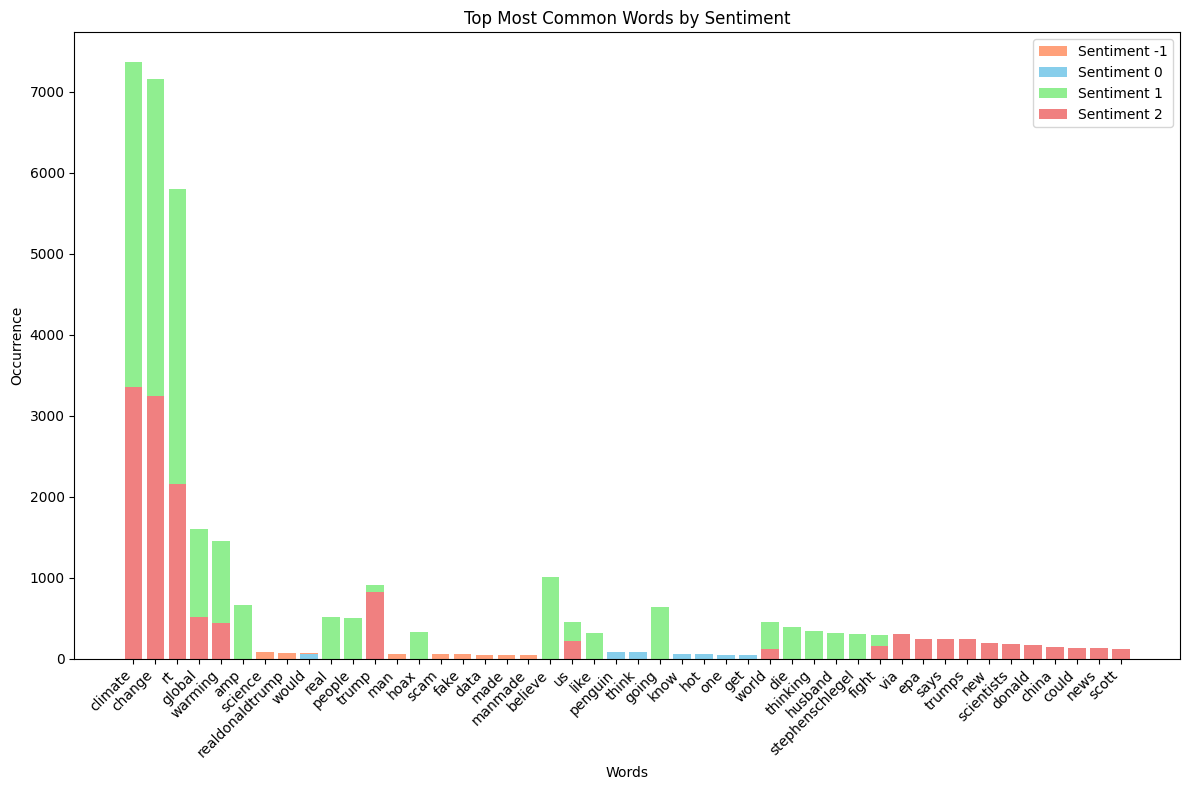

In [59]:
plot_most_common_words_grouped(tokenized_train_df, text_column='cleaned_message', top_n_words=20)

* Analysis of the most common words within the train data set and within each sentiment class shows that **climate**, **change**, **rt**, **global**, and **warming** are among the top five most tweeted words in regards to climate change sentiment analysis.
* Some common words like **think** and **trump** appear more than once and in various forms, warranting the need to normalise our data by ensuring words are in their base forms and we have less unique words using stemmatisation or lemmatisation.

In [60]:
# Show word cloud for most common words
def generate_word_cloud(text, title="Word Cloud"):
    """
    Generate and display a word cloud for the given text.

    Parameters:
    - text (str): Input text for generating the word cloud.
    - title (str): Title for the word cloud plot.

    Returns:
    None (displays the word cloud).
    """
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')  # Turn off axis labels
    plt.show()


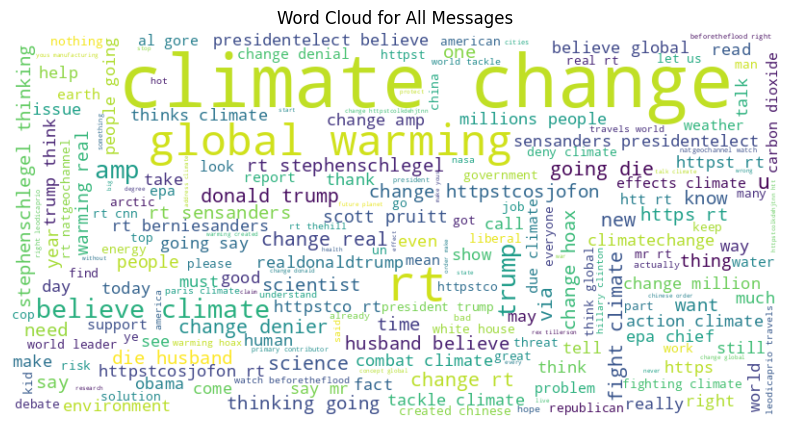

In [ ]:
# Concatenate cleaned messages into a single text
all_text = ' '.join(tokenized_train_df['cleaned_message'])

# Generate and display the word cloud
generate_word_cloud(all_text, title="Word Cloud for All Messages")

In [ ]:
# Generate word cloud for the top 30 words within each sentiment class
def generate_word_cloud(sentiment_df, sentiment_class, text_column='cleaned_message', top_n_words=30):
    """
    Generate and display a word cloud for the most common words in a specific sentiment class.

    Parameters:
    - sentiment_df (pd.DataFrame): DataFrame for a specific sentiment class with text data.
    - sentiment_class (int): The sentiment class for which to generate the word cloud.
    - text_column (str): Name of the column containing the text data.
    - top_n_words (int): Number of most common words to consider.

    Returns:
    None (displays the word cloud).
    """
    # Concatenate cleaned messages into a single text for the specified sentiment class
    sentiment_text = ' '.join(sentiment_df[text_column])

    # Define background color based on sentiment class
    background_colors = {
        1: 'lightblue',
        2: 'lightgreen',
        0: 'lightgrey',
        -1: 'lightcoral'
    }

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(sentiment_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Climate Change Sentiments for {sentiment_class}")
    plt.axis('off')  # Turn off axis labels
    plt.show()


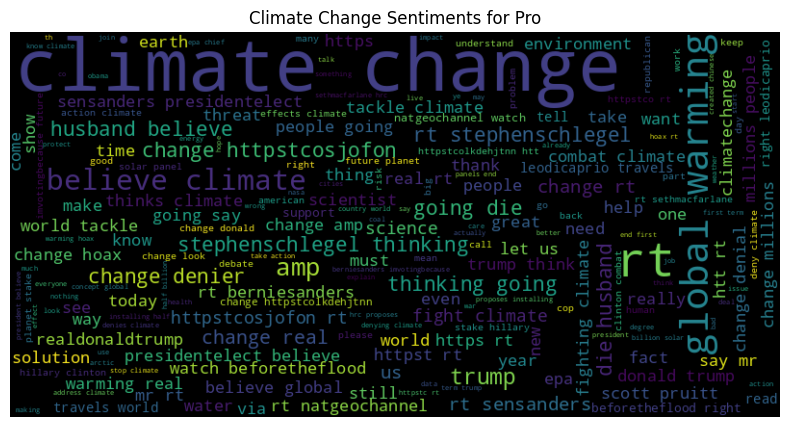

In [ ]:
# Generate word cloud for the sentiment class 1 (Pro)
sentiment_1_df = tokenized_train_df[tokenized_train_df['sentiment_class'] == 'pro']
generate_word_cloud(sentiment_1_df, sentiment_class='Pro')

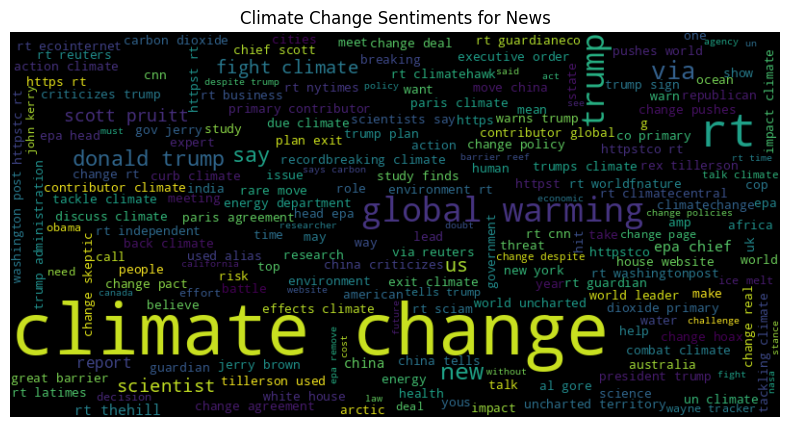

In [ ]:
# Generate word cloud for the sentiment class 2 (News)
sentiment_2_df = tokenized_train_df[tokenized_train_df['sentiment_class'] == 'news']
generate_word_cloud(sentiment_2_df, sentiment_class='News')

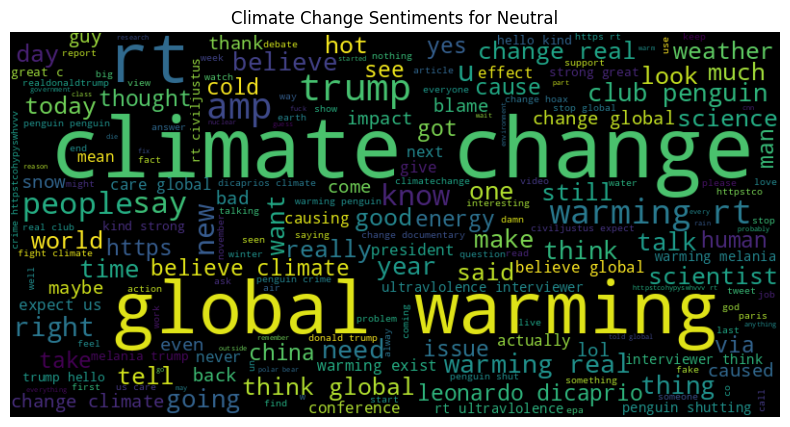

In [ ]:
# Generate word cloud for the sentiment class 0 (Neutral)
sentiment_0_df = tokenized_train_df[tokenized_train_df['sentiment_class'] == 'neutral']
generate_word_cloud(sentiment_0_df, sentiment_class='Neutral')

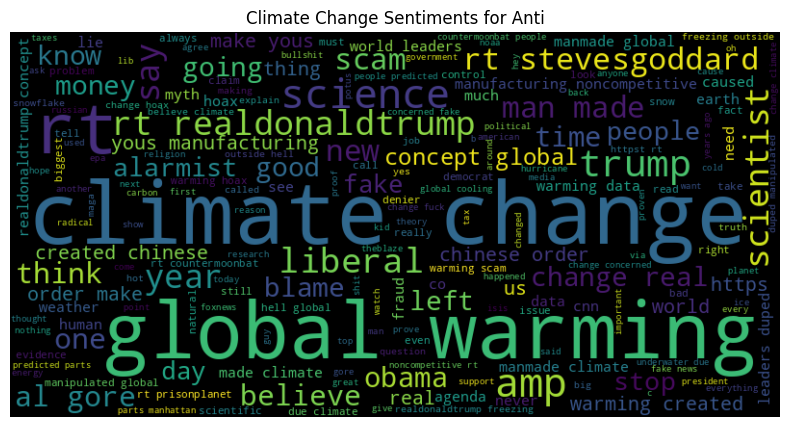

In [ ]:
# Generate word cloud for the sentiment class -1 (Anti)
sentiment_minus_1_df = tokenized_train_df[tokenized_train_df['sentiment_class'] == 'anti']
generate_word_cloud(sentiment_minus_1_df, sentiment_class='Anti')

* Some of the common words appearing in the word clouds are names of people like Obama and Trump, and names of countries like China. As such, Named Entity Recognition (NER) will be used to identify and categorise entities.

In [ ]:
def analyze_text_length(dataframe, text_column='cleaned_message'):
    """
    Analyze the distribution of text lengths in a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame containing text data.
    - text_column (str): Name of the column containing the text data.

    Returns:
    None (displays the text length distribution plot).
    """
    # Calculate text lengths
    dataframe['text_length'] = dataframe[text_column].apply(len)

    # Plot the distribution of text lengths
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe['text_length'], bins=50, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

    # Display summary statistics
    print("Summary Statistics for Text Length:")
    print(dataframe['text_length'].describe())

   sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief does not think carbon d...   625221   
1          1  It is not like we lack evidence of anthropogen...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954   

  sentiment_class                                    cleaned_message  \
0             pro  polyscimajor epa chief think carbon dioxide ma...   
1             pro    like lack evidence anthropogenic global warming   
2            news  rt rawstory researchers say three years act cl...   
3             pro  todayinmaker wired pivotal year war climate ch...   
4             pro  rt soynoviodetodas racist sexist climate chang...   

                                              tokens  text_length  
0  [polyscimajor, epa, chief, think, carbo

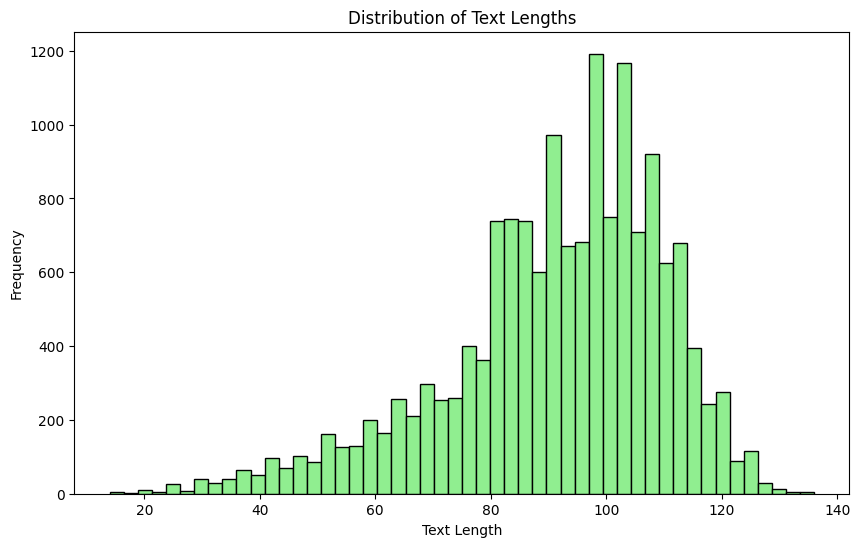

Summary Statistics for Text Length:
count    15819.000000
mean        91.253935
std         19.068206
min         14.000000
25%         81.000000
50%         94.000000
75%        105.000000
max        136.000000
Name: text_length, dtype: float64


In [ ]:
# Show text length in train_df
print(tokenized_train_df.head())
analyze_text_length(tokenized_train_df)

In [ ]:
# Identify and categorise entities like names and locations using NER
# Load the spaCy English NER model
nlp = spacy.load("en_core_web_sm")

def apply_ner(text):
    """
    Apply Named Entity Recognition (NER) on a given text using spaCy.

    Parameters:
    - text (str): Input text for NER.

    Returns:
    list: List of dictionaries containing entity information (text, label, and start/end indices).
    """
    doc = nlp(text)
    entities = [{'text': ent.text, 'label': ent.label_, 'start': ent.start_char, 'end': ent.end_char} for ent in doc.ents]
    return entities

def ner_on_dataframe(dataframe, text_column='message'):
    """
    Apply Named Entity Recognition (NER) on a specific column of a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame containing text data.
    - text_column (str): Name of the column containing the text data.

    Returns:
    pd.DataFrame: DataFrame with an additional column for NER results.
    """
    # Apply the apply_ner function to the specified column
    dataframe['ner_results'] = dataframe[text_column].apply(apply_ner)
    return dataframe


In [ ]:
ner_result_train_df = ner_on_dataframe(tokenized_train_df, text_column='message')
ner_result_train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief does not think carbon d...   625221   
1          1  It is not like we lack evidence of anthropogen...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954   

  sentiment_class                                    cleaned_message  \
0             pro  polyscimajor epa chief think carbon dioxide ma...   
1             pro    like lack evidence anthropogenic global warming   
2            news  rt rawstory researchers say three years act cl...   
3             pro  todayinmaker wired pivotal year war climate ch...   
4             pro  rt soynoviodetodas racist sexist climate chang...   

                                              tokens  text_length  \
0  [polyscimajor, epa, chief, think, carbon, diox...          100   
1  [like, lack, evidence, anthropogenic, global, ...           47   
2  [rt, rawstory, researchers, say, three, years,...           94   
3  [todayinmaker, wired, pivotal, year, war, clim...           67   
4  [rt, soynoviodetodas, racist, sexist, climate,...           89   

                                         ner_results  
0  [{'text': 'EPA', 'label': 'ORG', 'start': 13, ...  
1                                                 []  
2  [{'text': 'three years', 'label': 'DATE', 'sta...  
3  [{'text': '#TodayinMaker# WIRED', 'label': 'MO...  
4  [{'text': 'RT @SoyNovioDeTodas', 'label': 'ORG...

In [ ]:
# Lemmatise tokens
def lemmatize_text(tokens):
    """
    Perform lemmatization on a list of tokens using the WordNet lemmatizer.

    Parameters:
    - tokens (list): List of tokens to be lemmatized.

    Returns:
    list: List of lemmatized tokens.
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [ ]:
# Show lemmatised data for tokenized_train_df
lemmatized_train_df = preprocess_text(tokenized_train_df, 'cleaned_message', preprocessing_function=lemmatize_text)
lemmatized_train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief does not think carbon d...   625221   
1          1  It is not like we lack evidence of anthropogen...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954   

  sentiment_class                                    cleaned_message  \
0             pro  polyscimajor epa chief think carbon dioxide ma...   
1             pro    like lack evidence anthropogenic global warming   
2            news  rt rawstory researchers say three years act cl...   
3             pro  todayinmaker wired pivotal year war climate ch...   
4             pro  rt soynoviodetodas racist sexist climate chang...   

                                              tokens  text_length  \
0  [polyscimajor, epa, chief, think, carbon, diox...          100   
1  [like, lack, evidence, anthropogenic, global, ...           47   
2  [rt, rawstory, researchers, say, three, years,...           94   
3  [todayinmaker, wired, pivotal, year, war, clim...           67   
4  [rt, soynoviodetodas, racist, sexist, climate,...           89   

                                 preprocessed_tokens  \
0  [polyscimajor, epa, chief, think, carbon, diox...   
1  [like, lack, evidence, anthropogenic, global, ...   
2  [rt, rawstory, researcher, say, three, year, a...   
3  [todayinmaker, wired, pivotal, year, war, clim...   
4  [rt, soynoviodetodas, racist, sexist, climate,...   

                                   preprocessed_text  
0  polyscimajor epa chief think carbon dioxide ma...  
1    like lack evidence anthropogenic global warming  
2  rt rawstory researcher say three year act clim...  
3  todayinmaker wired pivotal year war climate ch...  
4  rt soynoviodetodas racist sexist climate chang...

In [ ]:
# Stemming data
def stem_text(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

In [ ]:

def preprocess_text(df, text_column, preprocessing_function):
    """
    Apply a specified text preprocessing function to a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing text data.
    - text_column (str): Name of the column in the DataFrame containing text data.
    - preprocessing_function (callable): Text preprocessing function (e.g., stem_text or lemmatize_text).

    Returns:
    pd.DataFrame: DataFrame with an additional column for the preprocessed text.
    """
    # Make a copy of the original DataFrame to avoid modifying the input DataFrame
    processed_df = df.copy()

    # Tokenize and preprocess the text using the specified function
    processed_df['tokens'] = processed_df[text_column].apply(word_tokenize)
    processed_df['preprocessed_tokens'] = processed_df['tokens'].apply(preprocessing_function)

    # Join the preprocessed tokens into a string
    processed_df['preprocessed_text'] = processed_df['preprocessed_tokens'].apply(lambda x: ' '.join(x))

    return processed_df


In [ ]:
stemmed_train_df = preprocess_text(tokenized_train_df, 'cleaned_message', preprocessing_function=stem_text)
stemmed_train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief does not think carbon d...   625221   
1          1  It is not like we lack evidence of anthropogen...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954   

  sentiment_class                                    cleaned_message  \
0             pro  polyscimajor epa chief think carbon dioxide ma...   
1             pro    like lack evidence anthropogenic global warming   
2            news  rt rawstory researchers say three years act cl...   
3             pro  todayinmaker wired pivotal year war climate ch...   
4             pro  rt soynoviodetodas racist sexist climate chang...   

                                              tokens  text_length  \
0  [polyscimajor, epa, chief, think, carbon, diox...          100   
1  [like, lack, evidence, anthropogenic, global, ...           47   
2  [rt, rawstory, researchers, say, three, years,...           94   
3  [todayinmaker, wired, pivotal, year, war, clim...           67   
4  [rt, soynoviodetodas, racist, sexist, climate,...           89   

                                 preprocessed_tokens  \
0  [polyscimajor, epa, chief, think, carbon, diox...   
1      [like, lack, evid, anthropogen, global, warm]   
2  [rt, rawstori, research, say, three, year, act...   
3  [todayinmak, wire, pivot, year, war, climat, c...   
4  [rt, soynoviodetoda, racist, sexist, climat, c...   

                                   preprocessed_text  
0  polyscimajor epa chief think carbon dioxid mai...  
1             like lack evid anthropogen global warm  
2  rt rawstori research say three year act climat...  
3  todayinmak wire pivot year war climat chang ht...  
4  rt soynoviodetoda racist sexist climat chang d...

<a id="six"></a>
## 7. Feature Engineering
<a href=#cont>Back to Table of Contents</a>    
    
    
        Extracting relevant features e.g Converting text data into a format suitable for machine learning models


<a id="seven"></a>
## 8. Model Building
<a href=#cont>Back to Table of Contents</a>
    
        Model selection: Trying different classification models (e.g., Naive Bayes,
        Support Vector Machines, Neural Networks) to determine the most suitable for
        sentiment classification.Training and evaluation: Training the models on the
        training set and evaluating their performance on the test set (using accuracy, precision, recall, F1-score, etc.).

<a id="eight"></a>
## 9. Hyperparameter Tuning
<a href=#cont>Back to Table of Contents</a>

    Optimizing model parameters: Performing grid search or random search
    to find the best hyperparameters for the chosen model(s).

<a id="nine"></a>
## 10. Model Evaluation
<a href=#cont>Back to Table of Contents</a>
        
        Evaluating the final model(s) on various metrics to determine their effectiveness in classifying sentiments.

<a id="ten"></a>
## 11. Inference
<a href=#cont>Back to Table of Contents</a>

        Making predictions: Using the trained model(s) to predict sentiments on new/unseen Twitter data.
        Visualizing results: Displaying model predictions alongside actual sentiments to showcase the model's performance.

<a id="eleven"></a>
## 12. Conclusion and Recommendations
<a href=#cont>Back to Table of Contents</a>

    Summarizing findings: summarize the results obtained from the sentiment analysis.
    Recommendations: Providing insights or suggestions based on the analysis that could
    be beneficial for marketing strategies or further research.